# Sonar use case

### Data description

The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.
The dataset contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time.


### Target

Our target variable is "Class" which contains two classes as given below:
1. Rock
2. Mine

### Important observations from data description

1. As entire data is with in same range (0.0 to 0.1) we don't need to scale the data.
2. Total number of columns are 61. It's not a huge number of column so no need to use PCA as well.

### Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
import pandas as pd
df=pd.read_csv('Sonar.csv')
df.sample(5)

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
151  0.0231  0.0315  0.0170  0.0226  0.0410  0.0116  0.0223  0.0805  0.2365   
43   0.0093  0.0269  0.0217  0.0339  0.0305  0.1172  0.1450  0.0638  0.0740   
95   0.0291  0.0400  0.0771  0.0809  0.0521  0.1051  0.0145  0.0674  0.1294   
163  0.0072  0.0027  0.0089  0.0061  0.0420  0.0865  0.1182  0.0999  0.1976   
64   0.0071  0.0103  0.0135  0.0494  0.0253  0.0806  0.0701  0.0738  0.0117   

        V10  ...     V52     V53     V54     V55     V56     V57     V58  \
151  0.2461  ...  0.0125  0.0036  0.0123  0.0043  0.0114  0.0052  0.0091   
43   0.1360  ...  0.0212  0.0091  0.0056  0.0086  0.0092  0.0070  0.0116   
95   0.1146  ...  0.0056  0.0237  0.0204  0.0050  0.0137  0.0164  0.0081   
163  0.2318  ...  0.0078  0.0071  0.0081  0.0034  0.0064  0.0037  0.0036   
64   0.0898  ...  0.0043  0.0048  0.0076  0.0124  0.0105  0.0054  0.0032   

        V59     V60  Class  
151  0.0008  0.0092   Mine  
43   0.0060  0.0110   Rock  
95   0.0139  0.0111   Rock  
163  0.0012  0.0037   Mine  
64   0.0073  0.0063   Rock  

[5 rows x 61 columns]

## Live chat support
# support.datatrained.org/main

In [4]:
df.shape # Checing the data dimension

(208, 61)

We have 208 rows and 61 columns including the target column.

In [5]:
df

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

        V10  ...     V52     V53     V54     V55     V56     V57     V58  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

        V59     V60  Class  
0    0.0090  0.0032   Rock  
1    0.0052  0.0044   Rock  
2    0.0095  0.0078   Rock  
3    0.0040  0.0117   Rock  
4    0.0107  0.0094   Rock  
..      ...     ...    ...  
203  0.0193  0.0157   Mine  
204  0.0062  0.0067   Mine  
205  0.0077  0.0031   Mine  
206  0.0036  0.0048   Mine  
207  0.0061  0.0115   Mine  

[208 rows x 61 columns]

In [6]:
pd.set_option('display.max_rows', None) # This code will display all the rows in output (needed because we have 61 columns)

In [7]:
df

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
13   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
16   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
17   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
20   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
22   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
24   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
26   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
28   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
30   0.0240  0.0218  0.0324  0.0569  0.0330  0.0513  0.0897  0.0713  0.0569   
31   0.0084  0.0153  0.0291  0.0432  0.0951  0.0752  0.0414  0.0259  0.0692   
32   0.0195  0.0213  0.0058  0.0190  0.0319  0.0571  0.1004  0.0668  0.0691   
33   0.0442  0.0477  0.0049  0.0581  0.0278  0.0678  0.1664  0.1490  0.0974   
34   0.0311  0.0491  0.0692  0.0831  0.0079  0.0200  0.0981  0.1016  0.2025   
35   0.0206  0.0132  0.0533  0.0569  0.0647  0.1432  0.1344  0.2041  0.1571   
36   0.0094  0.0166  0.0398  0.0359  0.0681  0.0706  0.1020  0.0893  0.0381   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
39   0.0091  0.0213  0.0206  0.0505  0.0657  0.0795  0.0970  0.0872  0.0743   
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
41   0.0093  0.0185  0.0056  0.0064  0.0260  0.0458  0.0470  0.0057  0.0425   
42   0.0211  0.0319  0.0415  0.0286  0.0121  0.0438  0.1299  0.1390  0.0695   
43   0.0093  0.0269  0.0217  0.0339  0.0305  0.1172  0.1450  0.0638  0.0740   
44   0.0257  0.0447  0.0388  0.0239  0.1315  0.1323  0.1608  0.2145  0.0847   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
46   0.0308  0.0339  0.0202  0.0889  0.1570  0.1750  0.0920  0.1353  0.1593   
47   0.0373  0.0281  0.0232  0.0225  0.0179  0.0733  0.0841  0.1031  0.0993   
48   0.0190  0.0038  0.0642  0.0452  0.0333  0.0690  0.0901  0.1454  0.0740   
49   0.0119  0.0582  0.0623  0.0600  0.1397  0.1883  0.1422

In [8]:
# Statistical summary
df.describe()

V1          V2          V3          V4          V5          V6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               V7          V8          V9         V10  ...         V51  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.134416  ...    0.012008   
min      0.003300    0.005500    0.007500    0.011300  ...    0.000000   
25%      0.080900    0.080425    0.097025    0.111275  ...    0.008425   
50%      0.106950    0.112100    0.152250    0.182400  ...    0.013900   
75%      0.154000    0.169600    0.233425    0.268700  ...    0.020825   
max      0.372900    0.459000    0.682800    0.710600  ...    0.100400   

              V52         V53         V54         V55         V56         V57  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.013420    0.010709    0.010941    0.009290    0.008222    0.007820   
std      0.009634    0.007060    0.007301    0.007088    0.005736    0.005785   
min      0.000800    0.000500    0.001000    0.000600    0.000400    0.000300   
25%      0.007275    0.005075    0.005375    0.004150    0.004400    0.003700   
50%      0.011400    0.009550    0.009300    0.007500    0.006850    0.005950   
75%      0.016725    0.014900    0.014500    0.012100    0.010575    0.010425   
max      0.070900    0.039000    0.035200    0.044700    0.039400    0.035500   

              V58         V59         V60  
count  208.000000  208.000000  208.000000  
mean     0.007949    0.007941    0.006507  
std      0.006470    0.006181    0.005031  
min      0.000300    0.000100    0.000600  
25%      0.003600    0.003675    0.003100  
50%      0.005800    0.006400    0.005300  
75%      0.010350    0.010325    0.008525  
max      0.044000    0.036400    0.043900  

[8 rows x 60 columns]

There are 61 columns so all are not getting displayed here. We will check for outliers and skewness seperately in further steps.

In [9]:
# Checking the null values in dataset
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
V35      0
V36      0
V37      0
V38      0
V39      0
V40      0
V41      0
V42      0
V43      0
V44      0
V45      0
V46      0
V47      0
V48      0
V49      0
V50      0
V51      0
V52      0
V53      0
V54      0
V55      0
V56      0
V57      0
V58      0
V59      0
V60      0
Class    0
dtype: int64

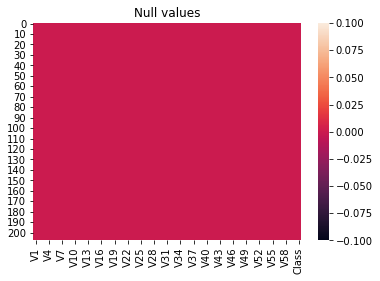

In [10]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There are no null values in the dataset

## Target Variable

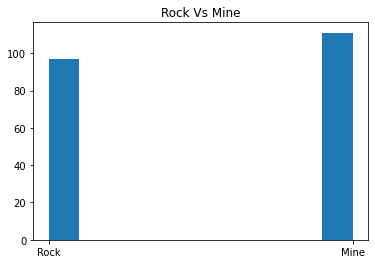

In [30]:
df["Class"].hist(grid=False)
plt.title("Rock Vs Mine")
plt.show()

There is no sign of class imbalance.

### Label Encoding

### Label Encoding ==> Alphabetical Order

Label encoding is needed to convert "Rock" & "Mine" into 0 and 1 so that we can check the correlation of target variable with other columns.

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Class"]=LE.fit_transform(df["Class"])
df["Class"].value_counts()

0    111
1     97
Name: Class, dtype: int64

In [12]:
LE.inverse_transform([1,0])

array(['Rock', 'Mine'], dtype=object)

In [13]:
df['Class'].value_counts()

0    111
1     97
Name: Class, dtype: int64

### Checking correlation

In [14]:
df.corr()

V1        V2        V3        V4        V5        V6        V7  \
V1     1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
V2     0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
V3     0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
V4     0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
V5     0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
V6     0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
V7     0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
V8     0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
V9     0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
V10    0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
V11    0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
V12    0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
V13    0.210722  0.249596  0.258767  0.215754  0.299086  0.411107  0.365391   
V14    0.256278  0.273170  0.291724  0.286708  0.359062  0.396233  0.409576   
V15    0.304878  0.307599  0.285663  0.278529  0.318059  0.367908  0.411692   
V16    0.239079  0.261844  0.237017  0.248245  0.328725  0.353783  0.363086   
V17    0.137845  0.152170  0.201093  0.223203  0.326477  0.293190  0.250024   
V18    0.041817  0.042870  0.120587  0.194992  0.299266  0.235778  0.208057   
V19    0.055227  0.040911  0.099303  0.189405  0.340543  0.226305  0.215495   
V20    0.156760  0.102428  0.103117  0.188317  0.285737  0.206841  0.196496   
V21    0.117663  0.075255  0.063990  0.142271  0.205088  0.174768  0.165827   
V22   -0.056973 -0.074157 -0.026815  0.036010  0.152897  0.123770  0.063773   
V23   -0.163426 -0.179365 -0.073400 -0.029749  0.073934  0.064081  0.009359   
V24   -0.218093 -0.196469 -0.085380 -0.102975 -0.000624  0.027026  0.011982   
V25   -0.295683 -0.295302 -0.214256 -0.206673 -0.067296 -0.043280 -0.057147   
V26   -0.342865 -0.365749 -0.291974 -0.291357 -0.125675 -0.100309 -0.126074   
V27   -0.341703 -0.337046 -0.263111 -0.294749 -0.169618 -0.129094 -0.179526   
V28   -0.224340 -0.234386 -0.256674 -0.256074 -0.214692 -0.118645 -0.116848   
V29   -0.199099 -0.228490 -0.290728 -0.300476 -0.283863 -0.156081 -0.129694   
V30   -0.077430 -0.115301 -0.197493 -0.236602 -0.273350 -0.151186 -0.068142   
V31   -0.048370 -0.055862 -0.106198 -0.190086 -0.214336 -0.054136 -0.096945   
V32   -0.030444 -0.049683 -0.109895 -0.169987 -0.173485 -0.051934 -0.115871   
V33   -0.031939 -0.108272 -0.170671 -0.164651 -0.200586 -0.144391 -0.127052   
V34    0.031319 -0.004247 -0.099409 -0.083965 -0.140559 -0.070337 -0.077662   
V35    0.098118  0.115824  0.017053  0.015200 -0.086529 -0.028815 -0.015531   
V36    0.080722  0.132611  0.053070  0.039282 -0.073481 -0.023621  0.002979   
V37    0.119565  0.169186  0.107530  0.063486 -0.064617 -0.064798 -0.001376   
V38    0.209873  0.217494  0.130276  0.089887 -0.008620 -0.048745  0.065900   
V39    0.208371  0.186828  0.110499  0.089346  0.063408  0.030599  0.080942   
V40    0.099993  0.098350  0.074137  0.045141  0.061616  0.081119  0.112673   
V41    0.127313  0.188226  0.189047  0.145241  0.098832  0.075797  0.041071   
V42    0.213592  0.261345  0.233442  0.144693  0.125181  0.048763 -0.028720   
V43    0.206057  0.186368  0.113920  0.050629  0.063706  0.034380 -0.025727   
V44    0.157949  0.133018  0.071946 -0.008407  0.031575  0.048870  0.061404   
V45    0.279968  0.285716  0.180734  0.087824  0.089202  0.085468  0.110813   
V46    0.319354  0.304247  0.173649  0.080012  0.081964  0.029524  0.076537   
V47    0.230343  0.255797  0.179528  0.046109  0.041419  0.016640  0.098925   
V48    0.203234  0.265279  0.234896  0.121065  0.084435  0.067196  0.155221   
V49    0.247560  0.313995  0.223074  0.133294  0.088128  0.080729  0.194720   
V50    0.269287  0.245868  0.081096  0.077925  0.066751  0.0173

In [16]:
corr_mat=df.corr()

# size of the canvas
plt.figure(figsize=[420,320])
# plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Observations: We are unable to identify the correlation in above heatmap due to huge number of columns. Let's print the correlation values of independent variables with target variable in sorted form.

In [36]:
corr_matrix=df.corr()
corr_matrix

V1        V2        V3        V4        V5        V6        V7  \
V1     1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
V2     0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
V3     0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
V4     0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
V5     0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
V6     0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
V7     0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
V8     0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
V9     0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
V10    0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
V11    0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
V12    0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
V13    0.210722  0.249596  0.258767  0.215754  0.299086  0.411107  0.365391   
V14    0.256278  0.273170  0.291724  0.286708  0.359062  0.396233  0.409576   
V15    0.304878  0.307599  0.285663  0.278529  0.318059  0.367908  0.411692   
V16    0.239079  0.261844  0.237017  0.248245  0.328725  0.353783  0.363086   
V17    0.137845  0.152170  0.201093  0.223203  0.326477  0.293190  0.250024   
V18    0.041817  0.042870  0.120587  0.194992  0.299266  0.235778  0.208057   
V19    0.055227  0.040911  0.099303  0.189405  0.340543  0.226305  0.215495   
V20    0.156760  0.102428  0.103117  0.188317  0.285737  0.206841  0.196496   
V21    0.117663  0.075255  0.063990  0.142271  0.205088  0.174768  0.165827   
V22   -0.056973 -0.074157 -0.026815  0.036010  0.152897  0.123770  0.063773   
V23   -0.163426 -0.179365 -0.073400 -0.029749  0.073934  0.064081  0.009359   
V24   -0.218093 -0.196469 -0.085380 -0.102975 -0.000624  0.027026  0.011982   
V25   -0.295683 -0.295302 -0.214256 -0.206673 -0.067296 -0.043280 -0.057147   
V26   -0.342865 -0.365749 -0.291974 -0.291357 -0.125675 -0.100309 -0.126074   
V27   -0.341703 -0.337046 -0.263111 -0.294749 -0.169618 -0.129094 -0.179526   
V28   -0.224340 -0.234386 -0.256674 -0.256074 -0.214692 -0.118645 -0.116848   
V29   -0.199099 -0.228490 -0.290728 -0.300476 -0.283863 -0.156081 -0.129694   
V30   -0.077430 -0.115301 -0.197493 -0.236602 -0.273350 -0.151186 -0.068142   
V31   -0.048370 -0.055862 -0.106198 -0.190086 -0.214336 -0.054136 -0.096945   
V32   -0.030444 -0.049683 -0.109895 -0.169987 -0.173485 -0.051934 -0.115871   
V33   -0.031939 -0.108272 -0.170671 -0.164651 -0.200586 -0.144391 -0.127052   
V34    0.031319 -0.004247 -0.099409 -0.083965 -0.140559 -0.070337 -0.077662   
V35    0.098118  0.115824  0.017053  0.015200 -0.086529 -0.028815 -0.015531   
V36    0.080722  0.132611  0.053070  0.039282 -0.073481 -0.023621  0.002979   
V37    0.119565  0.169186  0.107530  0.063486 -0.064617 -0.064798 -0.001376   
V38    0.209873  0.217494  0.130276  0.089887 -0.008620 -0.048745  0.065900   
V39    0.208371  0.186828  0.110499  0.089346  0.063408  0.030599  0.080942   
V40    0.099993  0.098350  0.074137  0.045141  0.061616  0.081119  0.112673   
V41    0.127313  0.188226  0.189047  0.145241  0.098832  0.075797  0.041071   
V42    0.213592  0.261345  0.233442  0.144693  0.125181  0.048763 -0.028720   
V43    0.206057  0.186368  0.113920  0.050629  0.063706  0.034380 -0.025727   
V44    0.157949  0.133018  0.071946 -0.008407  0.031575  0.048870  0.061404   
V45    0.279968  0.285716  0.180734  0.087824  0.089202  0.085468  0.110813   
V46    0.319354  0.304247  0.173649  0.080012  0.081964  0.029524  0.076537   
V47    0.230343  0.255797  0.179528  0.046109  0.041419  0.016640  0.098925   
V48    0.203234  0.265279  0.234896  0.121065  0.084435  0.067196  0.155221   
V49    0.247560  0.313995  0.223074  0.133294  0.088128  0.080729  0.194720   
V50    0.269287  0.245868  0.081096  0.077925  0.066751  0.0173

In [37]:
corr_matrix=df.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class    1.000000
V36      0.269151
V35      0.227670
V37      0.209055
V34      0.172010
V31      0.110728
V33      0.107184
V32      0.055275
V38      0.040527
V40      0.035928
V17      0.003969
V57     -0.000933
V30     -0.004219
V16     -0.011581
V18     -0.014612
V41     -0.020942
V25     -0.025306
V26     -0.028063
V29     -0.036639
V27     -0.054997
V39     -0.056910
V15     -0.057318
V24     -0.074041
V28     -0.082486
V60     -0.090055
V55     -0.095639
V7      -0.114748
V23     -0.127413
V56     -0.129341
V59     -0.130826
V6      -0.132327
V19     -0.138204
V53     -0.141871
V42     -0.144147
V14     -0.157277
V50     -0.180224
V54     -0.182687
V58     -0.184191
V8      -0.189314
V3      -0.192195
V22     -0.201361
V5      -0.222232
V20     -0.224115
V2      -0.231238
V43     -0.234077
V21     -0.242755
V4      -0.250638
V1      -0.271694
V44     -0.273779
V52     -0.288651
V51     -0.293205
V47     -0.301697
V46     -0.305610
V13     -0.312811
V9      -0.321448
V48     -0

Now we can clearly identify the correlation of independent variable with target variable "Class".
There are around 20 variables who has less then 0.01 correlation value (very week relationship).

### Let's check the data distribution among all the columns

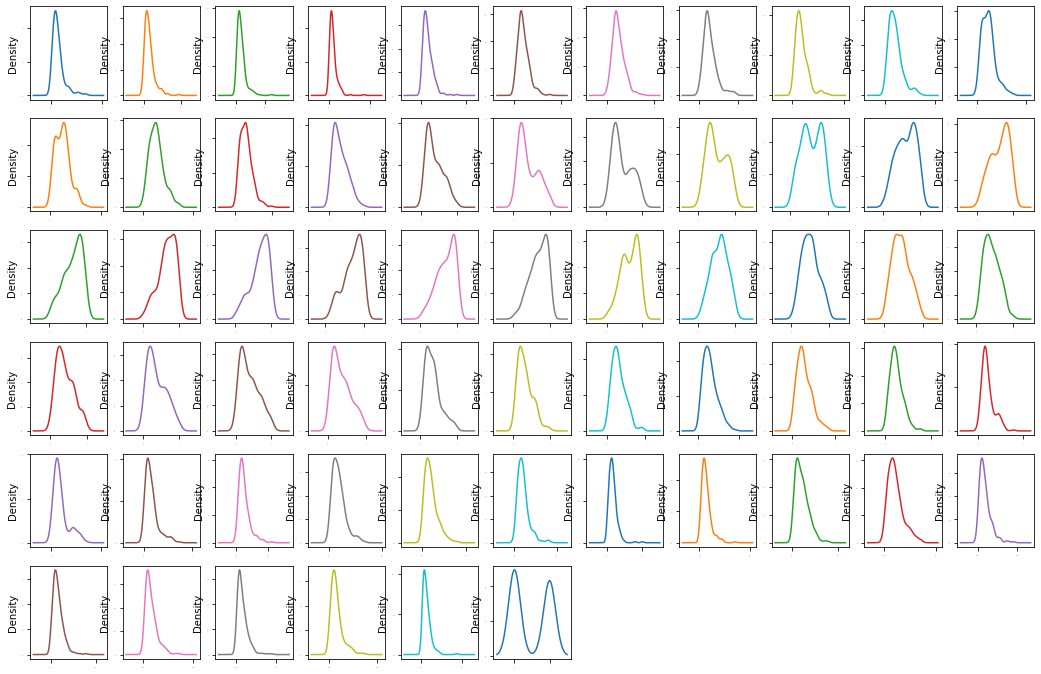

In [38]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

We can see skewness in data for multiple columns, will handle the skewness in further steps

### Splitting the independent and target variables in x and y before removing the skewness

In [18]:
x= df.drop("Class",axis=1)
y= df["Class"]

In [19]:
# Checking skewness
x.skew().sort_values()

V25   -0.788909
V24   -0.691861
V26   -0.671580
V27   -0.627843
V28   -0.615447
V23   -0.594350
V29   -0.442007
V22   -0.392289
V21   -0.252741
V30   -0.132390
V20   -0.085331
V31    0.259797
V19    0.283182
V32    0.313420
V33    0.423864
V18    0.525845
V34    0.563296
V12    0.588681
V35    0.591654
V36    0.619868
V17    0.654480
V37    0.676994
V16    0.694671
V13    0.736584
V15    0.763964
V42    0.860110
V40    0.861280
V41    0.863526
V39    0.908835
V43    0.909317
V7     0.970820
V11    0.987813
V14    1.022369
V38    1.033366
V53    1.060572
V54    1.093090
V44    1.235086
V6     1.248166
V49    1.273385
V48    1.277722
V10    1.281258
V45    1.366839
V8     1.481107
V9     1.633870
V57    1.653090
V46    1.706674
V59    1.737506
V50    1.761714
V56    1.780805
V55    1.789946
V47    1.790155
V5     2.018141
V52    2.093976
V58    2.098330
V1     2.131088
V2     2.155644
V3     2.652518
V51    2.716060
V60    2.775754
V4     3.401697
dtype: float64

We can see skewness in most of the columns of our dataset, We will remove the skewness using power_transform function.

In [42]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [47]:
x.skew().sort_values(ascending=False) # Validating that skewness has been removed or not

V58    0.220689
V60    0.204745
V1     0.200661
V57    0.200251
V2     0.196446
V4     0.190002
V55    0.189057
V3     0.187103
V45    0.170784
V46    0.169289
V59    0.166418
V52    0.148282
V5     0.140451
V49    0.132635
V53    0.130364
V54    0.125757
V17    0.124196
V47    0.120549
V56    0.120513
V50    0.106623
V16    0.102740
V37    0.100569
V48    0.096302
V18    0.094088
V36    0.087954
V38    0.086653
V44    0.083057
V39    0.078671
V35    0.078044
V9     0.077245
V51    0.077191
V10    0.073024
V15    0.070344
V41    0.061931
V42    0.049309
V34    0.047734
V11    0.047685
V8     0.039388
V14    0.039062
V6     0.038764
V40    0.035032
V12    0.033161
V43    0.032043
V13    0.024720
V33    0.020193
V19    0.019011
V7     0.017842
V32    0.005106
V31   -0.001851
V30   -0.047004
V20   -0.074176
V21   -0.106673
V29   -0.133525
V22   -0.144238
V24   -0.163443
V28   -0.167409
V23   -0.180086
V27   -0.195002
V26   -0.202206
V25   -0.205760
dtype: float64

In [32]:
sk = x.skew()
sk[np.abs(sk)>0.25].all()

True

In [ ]:
# mod
|a|
|-3| = -(-3)
|3| = 3


In [26]:
# return me the mod of the value
np.abs(-3)

3

In [21]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed, now we can proceed with further steps.

### Checking outliers 

There are 61 columns in dataset so it's not possible to plot each and every columns seperately or plot all together also. So we will print in 2 steps.

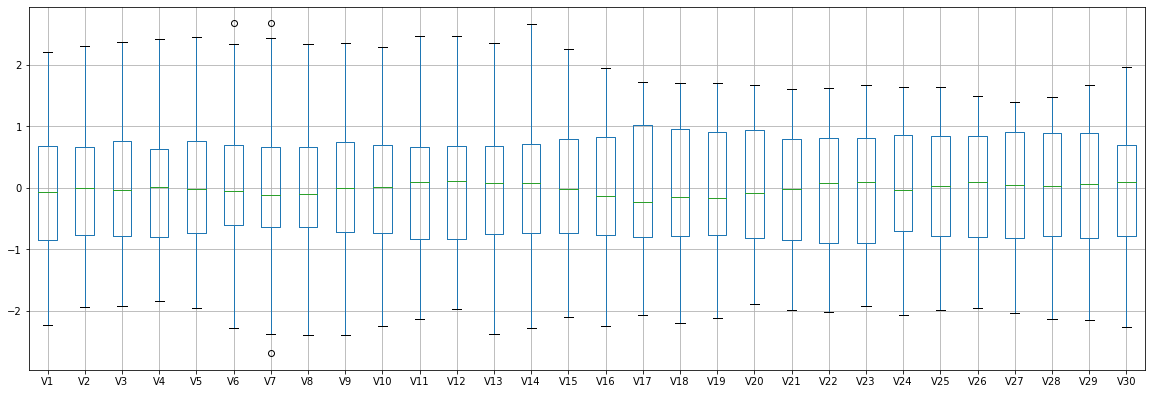

In [56]:
# Plotting boxplots for first 30 columns
x.iloc[:,0:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

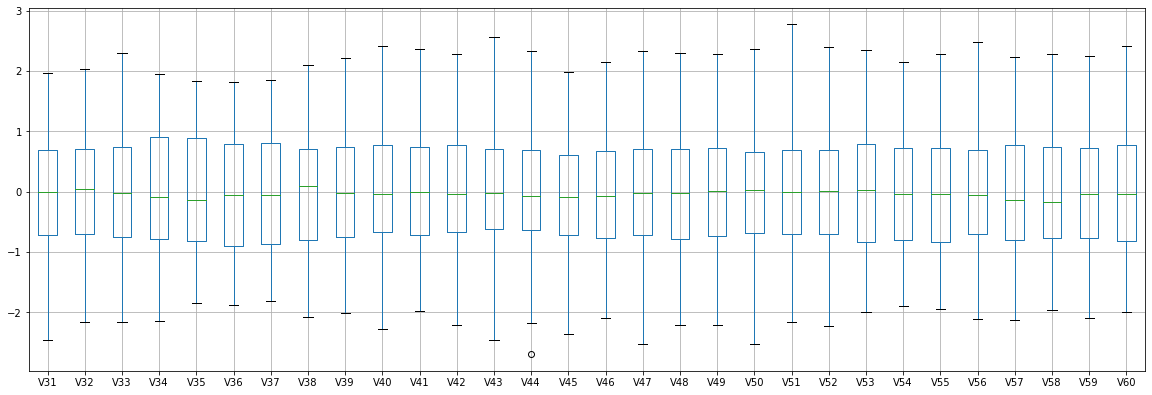

In [57]:
# Plotting for rest all the columns
x.iloc[:,30:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We can see one or two values for total 3 columns but those are very near to whiskers so these are not outliers.

### Lets Quantify

In [63]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

True

## No outliers are present in my Data

## Training process begins

### Finding best random_state

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [35]:
maxAccu=0 #maximum accuracy
maxRS=0   # best randon state value for which max accuracy is achieved
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9285714285714286  on Random_state  12


We have found best random_state value as 12. We will create our train_test split using this random_state.

### Creating train-test split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 12)

In [37]:
x_train

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
179  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
55   0.0201  0.0116  0.0123  0.0245  0.0547  0.0208  0.0891  0.0836  0.1335   
145  0.0721  0.1574  0.1112  0.1085  0.0666  0.1800  0.1108  0.2794  0.1408   
103  0.0162  0.0253  0.0262  0.0386  0.0645  0.0472  0.1056  0.1388  0.0598   
101  0.0335  0.0134  0.0696  0.1180  0.0348  0.1180  0.1948  0.1607  0.3036   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
138  0.0731  0.1249  0.1665  0.1496  0.1443  0.2770  0.2555  0.1712  0.0466   
137  0.0430  0.0902  0.0833  0.0813  0.0165  0.0277  0.0569  0.2057  0.3887   
151  0.0231  0.0315  0.0170  0.0226  0.0410  0.0116  0.0223  0.0805  0.2365   
174  0.0191  0.0173  0.0291  0.0301  0.0463  0.0690  0.0576  0.1103  0.2423   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
41   0.0093  0.0185  0.0056  0.0064  0.0260  0.0458  0.0470  0.0057  0.0425   
90   0.0126  0.0519  0.0621  0.0518  0.1072  0.2587  0.2304  0.2067  0.3416   
47   0.0373  0.0281  0.0232  0.0225  0.0179  0.0733  0.0841  0.1031  0.0993   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
129  0.1371  0.1226  0.1385  0.1484  0.1776  0.1428  0.1773  0.2161  0.1630   
61   0.0135  0.0045  0.0051  0.0289  0.0561  0.0929  0.1031  0.0883  0.1596   
24   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
93   0.0459  0.0437  0.0347  0.0456  0.0067  0.0890  0.1798  0.1741  0.1598   
108  0.0599  0.0474  0.0498  0.0387  0.1026  0.0773  0.0853  0.0447  0.1094   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
144  0.0299  0.0688  0.0992  0.1021  0.0800  0.0629  0.0130  0.0813  0.1761   
33   0.0442  0.0477  0.0049  0.0581  0.0278  0.0678  0.1664  0.1490  0.0974   
136  0.1088  0.1278  0.0926  0.1234  0.1276  0.1731  0.1948  0.4262  0.6828   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
67   0.0368  0.0403  0.0317  0.0293  0.0820  0.1342  0.1161  0.0663  0.0155   
142  0.0526  0.0563  0.1219  0.1206  0.0246  0.1022  0.0539  0.0439  0.2291   
77   0.0336  0.0294  0.0476  0.0539  0.0794  0.0804  0.1136  0.1228  0.1235   
113  0.0283  0.0599  0.0656  0.0229  0.0839  0.1673  0.1154  0.1098  0.1370   
39   0.0091  0.0213  0.0206  0.0505  0.0657  0.0795  0.0970  0.0872  0.0743   
42   0.0211  0.0319  0.0415  0.0286  0.0121  0.0438  0.1299  0.1390  0.0695   
159  0.0235  0.0220  0.0167  0.0516  0.0746  0.1121  0.1258  0.1717  0.3074   
17   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
50   0.0353  0.0713  0.0326  0.0272  0.0370  0.0792  0.1083  0.0687  0.0298   
94   0.0025  0.0309  0.0171  0.0228  0.0434  0.1224  0.1947  0.1661  0.1368   
34   0.0311  0.0491  0.0692  0.0831  0.0079  0.0200  0.0981  0.1016  0.2025   
192  0.0056  0.0267  0.0221  0.0561  0.0936  0.1146  0.0706  0.0996  0.1673   
66   0.0265  0.0440  0.0137  0.0084  0.0305  0.0438  0.0341  0.0780  0.0844   
95   0.0291  0.0400  0.0771  0.0809  0.0521  0.1051  0.0145  0.0674  0.1294   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
139  0.0164  0.0627  0.0738  0.0608  0.0233  0.1048  0.1338  0.0644  0.1522   
64   0.0071  0.0103  0.0135  0.0494  0.0253  0.0806  0.0701  0.0738  0.0117   
178  0.0197  0.0394  0.0384  0.0076  0.0251  0.0629  0.0747  0.0578  0.1357   
88   0.0274  0.0242  0.0621  0.0560  0.1129  0.0973  0.1823  0.1745  0.1440   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787

In [38]:
x_test

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
85   0.0365  0.1632  0.1636  0.1421  0.1130  0.1306  0.2112  0.2268  0.2992   
143  0.0516  0.0944  0.0622  0.0415  0.0995  0.2431  0.1777  0.2018  0.2611   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
191  0.0315  0.0252  0.0167  0.0479  0.0902  0.1057  0.1024  0.1209  0.1241   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
196  0.0050  0.0017  0.0270  0.0450  0.0958  0.0830  0.0879  0.1220  0.1977   
32   0.0195  0.0213  0.0058  0.0190  0.0319  0.0571  0.1004  0.0668  0.0691   
31   0.0084  0.0153  0.0291  0.0432  0.0951  0.0752  0.0414  0.0259  0.0692   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
63   0.0067  0.0096  0.0024  0.0058  0.0197  0.0618  0.0432  0.0951  0.0836   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
126  0.0715  0.0849  0.0587  0.0218  0.0862  0.1801  0.1916  0.1896  0.2960   
172  0.0180  0.0444  0.0476  0.0698  0.1615  0.0887  0.0596  0.1071  0.3175   
87   0.0856  0.0454  0.0382  0.0203  0.0385  0.0534  0.2140  0.3110  0.2837   
164  0.0163  0.0198  0.0202  0.0386  0.0752  0.1444  0.1487  0.1484  0.2442   
122  0.0249  0.0119  0.0277  0.0760  0.1218  0.1538  0.1192  0.1229  0.2119   
86   0.0188  0.0370  0.0953  0.0824  0.0249  0.0488  0.1424  0.1972  0.1873   
62   0.0086  0.0215  0.0242  0.0445  0.0667  0.0771  0.0499  0.0906  0.1229   
170  0.0134  0.0172  0.0178  0.0363  0.0444  0.0744  0.0800  0.0456  0.0368   
187  0.0368  0.0279  0.0103  0.0566  0.0759  0.0679  0.0970  0.1473  0.2164   
111  0.0530  0.0885  0.1997  0.2604  0.3225  0.2247  0.0617  0.2287  0.0950   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
156  0.0047  0.0059  0.0080  0.0554  0.0883  0.1278  0.1674  0.1373  0.2922   
92   0.0260  0.0192  0.0254  0.0061  0.0352  0.0701  0.1263  0.1080  0.1523   
202  0.0272  0.0378  0.0488  0.0848  0.1127  0.1103  0.1349  0.2337  0.3113   
152  0.0131  0.0201  0.0045  0.0217  0.0230  0.0481  0.0742  0.0333  0.1369   
190  0.0156  0.0210  0.0282  0.0596  0.0462  0.0779  0.1365  0.0780  0.1038   
98   0.1313  0.2339  0.3059  0.4264  0.4010  0.1791  0.1853  0.0055  0.1929   
135  0.0094  0.0611  0.1136  0.1203  0.0403  0.1227  0.2495  0.4566  0.6587   
16   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
188  0.0089  0.0274  0.0248  0.0237  0.0224  0.0845  0.1488  0.1224  0.1569   
132  0.0968  0.0821  0.0629  0.0608  0.0617  0.1207  0.0944  0.4223  0.5744   
127  0.0209  0.0261  0.0120  0.0768  0.1064  0.1680  0.3016  0.3460  0.3314   
177  0.0201  0.0165  0.0344  0.0330  0.0397  0.0443  0.0684  0.0903  0.1739   
124  0.0388  0.0324  0.0688  0.0898  0.1267  0.1515  0.2134  0.2613  0.2832   
51   0.0131  0.0068  0.0308  0.0311  0.0085  0.0767  0.0771  0.0640  0.0726   
197  0.0366  0.0421  0.0504  0.0250  0.0596  0.0252  0.0958  0.0991  0.1419   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
167  0.0137  0.0297  0.0116  0.0082  0.0241  0.0253  0.0279  0.0130  0.0489   
189  0.0158  0.0239  0.0150  0.0494  0.0988  0.1425  0.1463  0.1219  0.1697   

        V10  ...     V51     V52     V53     V54     V55     V56     V57  \
85   0.3735  ...  0.0223  0.0110  0.0071  0.0205  0.0164  0.0063  0.0078   
143  0.1294  ...  0.0456  0.0432  0.0274  0.0152  0.0120  0.0129  0.0020   
207  0.2354  ...  0.0181  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040   
203  0.2684  ...  0.0203  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065   
191  0.1533  ...  0.0138  0.0108  0.0062  0.0044  0.0072  0.0007  0.0054   
11   0.0835  ...  0.0188  0.0133  0.0265  0.0224  0.0074  0.0118  0.0026   
6    0.3513  ...  0.0195  0.0201  0.0248  0.0131  0.0070  0.0138  0.0092   
196

In [39]:
y_train

179    0
55     1
145    0
103    0
101    0
1      1
5      1
138    0
137    0
151    0
174    0
14     1
41     1
90     1
47     1
12     1
129    0
61     1
24     1
8      1
40     1
93     1
108    0
45     1
144    0
33     1
136    0
15     1
67     1
142    0
77     1
113    0
39     1
42     1
159    0
17     1
50     1
94     1
34     1
192    0
66     1
95     1
37     1
38     1
139    0
64     1
178    0
88     1
19     1
140    0
131    0
148    0
81     1
149    0
125    0
165    0
168    0
186    0
193    0
78     1
166    0
199    0
106    0
26     1
72     1
83     1
201    0
10     1
46     1
36     1
198    0
30     1
54     1
194    0
71     1
185    0
200    0
52     1
206    0
120    0
48     1
182    0
2      1
28     1
169    0
153    0
9      1
69     1
183    0
97     0
102    0
57     1
80     1
112    0
0      1
154    0
171    0
184    0
91     1
114    0
157    0
116    0
150    0
18     1
147    0
43     1
105    0
20     1
121    0
99     0
84     1
5

In [40]:
y_test

85     1
143    0
207    0
203    0
191    0
11     1
6      1
196    0
32     1
31     1
21     1
63     1
7      1
126    0
172    0
87     1
164    0
122    0
86     1
62     1
170    0
187    0
111    0
23     1
156    0
92     1
202    0
152    0
190    0
98     0
135    0
16     1
188    0
132    0
127    0
177    0
124    0
51     1
197    0
29     1
167    0
189    0
Name: Class, dtype: int32

In [41]:
x_train.shape

(166, 60)

In [42]:
y_train.shape

(166,)

In [43]:
x_test.shape

(42, 60)

In [44]:
y_test.shape

(42,)

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  92.85714285714286
[[25  1]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.93      0.88      0.90        16

    accuracy                           0.93        42
   macro avg       0.93      0.92      0.92        42
weighted avg       0.93      0.93      0.93        42



### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  66.66666666666666
[[20  6]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.57      0.50      0.53        16

    accuracy                           0.67        42
   macro avg       0.64      0.63      0.64        42
weighted avg       0.66      0.67      0.66        42



### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  80.95238095238095
[[24  2]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        26
           1       0.83      0.62      0.71        16

    accuracy                           0.81        42
   macro avg       0.82      0.77      0.79        42
weighted avg       0.81      0.81      0.80        42



### SVC

In [48]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  88.09523809523809
[[23  3]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.82      0.88      0.85        16

    accuracy                           0.88        42
   macro avg       0.87      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



Logistic Regression, Random Forest and SVC are producing good accuracy. Now we will check cross validation scoare as well for overfitting(if exists).

### Cross validation

In [49]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

Cross validation score of Logistic Regression model : 0.6300813008130082


In [50]:
scr2=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest model :",scr2.mean())

Cross validation score of Random Forest model : 0.6786295005807201


In [51]:
scr3=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC model :",scr3.mean())

Cross validation score of SVC model : 0.5624854819976771


RandomForestClassifer is perfroming better among all so we will continue with RandomForestClassifier.

### Hyper parameter tuning 

In [52]:
from sklearn.model_selection import GridSearchCV

# Creating parameter list to pass in GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}

In [53]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model
GCV.best_params_  # Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [54]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Predicting with best parameters
accuracy_score(y_test,GCV_pred) # Checking final accuracy

0.7857142857142857

### ROC AUC plot 

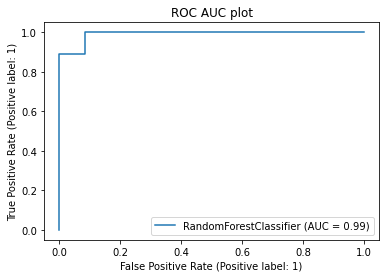

In [76]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

Final accuracy is 93%  and AUC score is 98% which is pretty good.

### Saving the model in pickle format 

In [55]:
# PICKELING OF FILE OR SERIALIZATION OF A FILE
import joblib
joblib.dump(GCV.best_estimator_,"SonarModel.pkl")

['SonarModel.pkl']